<a href="https://colab.research.google.com/github/reni-hristova/Classification-Fashion-MNIST/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"Import and rename libraries needed for all models"
import tensorflow as tf
import numpy as np

import math
import matplotlib.pyplot as plt

## Import Keras dataset

In [2]:
# Import Fashion MNIST dataset from Keras 
(train_set, train_labels), (test_set, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Visualisation

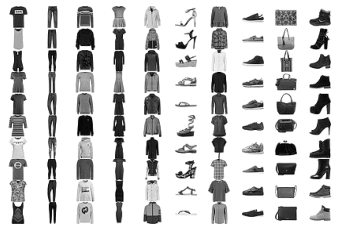

In [3]:
# Visualisation
fig, ax = plt.subplots(10,10)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(10):
    t = train_set[train_labels==i,:,:][0:10,:,:]
    for j in range(10):
        ax[j,i].imshow(t[j,:,:], cmap=plt.cm.binary)
        ax[j,i].set_axis_off()
plt.savefig('mnist-10x10.pdf')

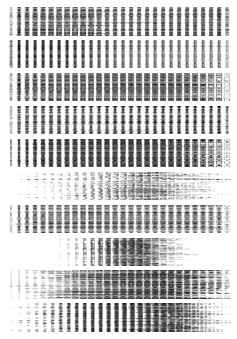

In [4]:
fig, ax = plt.subplots(10,1,figsize=[4,6])
plt.subplots_adjust(wspace=0, hspace=0.1)
for i in range(10):
    t = np.random.permutation(train_set[train_labels==i,:,:])
    im = []
    for j in range(100):
        im.append(np.squeeze(np.reshape(t[j,:,:],(1,-1))))
    im = np.array(im)
    ax[i].imshow(np.array(im), cmap=plt.cm.binary)
    ax[i].set_axis_off()
plt.savefig('mnist-vectorised.pdf')

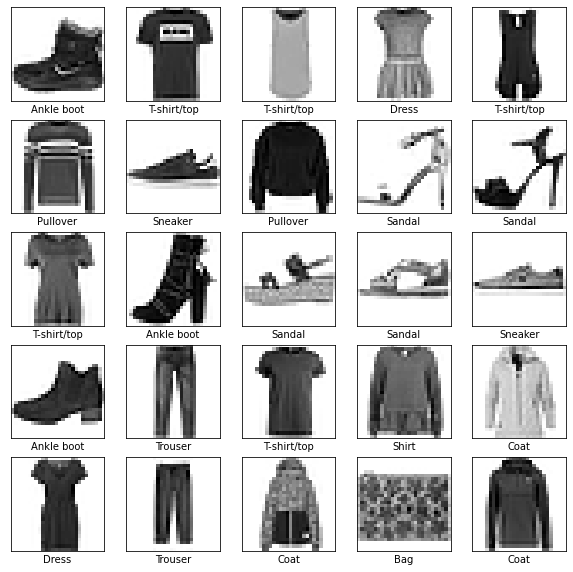

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Preprocessing

In [3]:
from sklearn.model_selection import train_test_split

# test_size: what proportion of original data is used for test set
train_set, validation_set, train_labels, validation_labels = train_test_split(train_set, train_labels, test_size = 10/60.0, random_state=0)

In [4]:
# Normalise the values in the images to be between 0 and 1 (Normally the range is 0, 255)
train_set = train_set / 255.0
test_set = test_set / 255.0
validation_set = validation_set / 255.0

# Change the dimentions of the data - KNN?
test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))
validation_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in validation_set]))

In [5]:
# Checking the number of features originally in the dataset
print(train_set.shape)
print(validation_set.shape)
print(test_set.shape)

(50000, 784)
(10000, 784)
(10000, 784)


PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(.97)   # Best number of components found experimentally
pca.fit(train_set)

PCA(copy=True, iterated_power='auto', n_components=0.97, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# Transform the training and the data into the lower dimentional space
train_set = pca.transform(train_set)
validation_set = pca.transform(validation_set)
test_set = pca.transform(test_set)

In [8]:
# Checking the number of features retained
print(train_set.shape)
print(validation_set.shape)
print(test_set.shape)

(50000, 277)
(10000, 277)
(10000, 277)


# SVM - Training
Optimise the parmeters for each of the three kernels.

*   For the linear kernel     - optimise C.
*   For the RBF kernel        - optimise C and gamma. 
*   For the Polynomial kernel - optimise C, gamma and degree.



In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set best accuracy to a small value initially
best_accuracy = - 1

# Define possible kernels
kernels = ['rbf', 'linear', 'poly']

# Define the values each hyper parameter can take
C_array = [0.01, 0.1, 1.00, 10.00, 100.00] 
gamma_array = [0.01, 0.02, 0.03, 0.04, 0.05]
degree_array = [3, 4, 5]


for KERNEL in kernels:
  print("\nKernel is ", KERNEL)
  if (KERNEL == 'linear'):
    # Test every possible value C from the predefined list C_array
    for i in range(0, len(C_array)):
      C_HYPER = C_array[i]
      print("\nTesting C = ", C_HYPER)

      # Create a model
      classifier = SVC(C = C_HYPER, kernel = KERNEL)
      classifier.fit(train_set, train_labels)

      # Predict labels for the test set
      predicted_labels = classifier.predict(test_set)

      # If the accuracy is higher than the current best, update the highest accuracy and the best number of neighbours
      if accuracy_score(test_labels, predicted_labels) > best_accuracy:
        best_accuracy = accuracy_score(test_labels, predicted_labels)
        best_params = [KERNEL, C_HYPER]
        print("\nNew best accuracy score: ", accuracy_score(test_labels, predicted_labels))
        
    print("\n\n ! Finished with Linear.\n Best parameters are: ", best_params, "\nAccuracy for them is ", best_accuracy)
  elif (KERNEL == 'rbf'):
    # Test every combination of a C and a gamma from the predefined lists C_array and gamma_array
    for i in range(0, len(C_array)):
      C_HYPER = C_array[i]

      for j in range(0, len(gamma_array)):
        GAMA_HYPER = gamma_array[j]
        print("\nTesting C = ", C_HYPER, "gamma = ", GAMA_HYPER)

        classifier = SVC(C = C_HYPER, gamma = GAMA_HYPER, kernel = KERNEL)
        classifier.fit(train_set, train_labels)

        # Predict labels for the test set
        predicted_labels = classifier.predict(test_set)

        # If the accuracy is higher than the current best, update the highest accuracy and the best number of neighbours
        if accuracy_score(test_labels, predicted_labels) > best_accuracy:
          best_accuracy = accuracy_score(test_labels, predicted_labels)
          best_params = [KERNEL, C_HYPER, GAMA_HYPER]
          
          print("\nNew best accuracy score: ", accuracy_score(test_labels, predicted_labels))

    print("\n\n ! Finished with RBF.\n Best parameters are: ", best_params, "\nAccuracy for them is ", best_accuracy)
  
  elif (KERNEL == 'poly'):
    # Test every combination of a C, gamma and degree from the predefined lists C_array, gamma_array and degree_array
    for i in range(0, len(C_array)):
      C_HYPER = C_array[i]
      for j in range(0, len(gamma_array)):
        GAMA_HYPER = gamma_array[j]
        for k in range(0, len(degree_array)):
          DEGREE = degree_array[k]
          print("\nTesting C = ", C_HYPER, " gamma = ", GAMA_HYPER, " degree", DEGREE, " coef0 = default")

          # Create the model
          classifier = SVC(C = C_HYPER, gamma = GAMA_HYPER, kernel = KERNEL, degree = DEGREE)
          classifier.fit(train_set, train_labels)

          # Predict labels for the test set
          predicted_labels = classifier.predict(test_set)
            
          # If the accuracy is higher than the current best, update the highest accuracy and the best number of neighbours
          if accuracy_score(test_labels, predicted_labels) > best_accuracy:
            best_accuracy = accuracy_score(test_labels, predicted_labels)
            best_params = [KERNEL, C_HYPER, GAMA_HYPER, DEGREE]
            print("\nNew best accuracy score: ", accuracy_score(test_labels, predicted_labels))
  else:
    print("\nKernel not recognised.")

print("\nOptimisaion Finished. Best Score is ", best_accuracy, "\nBest parameters are ", best_params)

In [ ]:
# Assign optimised parameters to the hyperparameters for the model
KERNEL = best_params[0]
C_HYPER = best_params[1]

if (len(best_params) > 2):
  GAMA_HYPER = best_params[2]
  if (len(best_params) == 4):
    DEGREE = best_params[3]

# Evaluation of the best model

In [12]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set hyperparameter for the optimised model (if you haven't ran the optimisation)
KERNEL = 'rbf'
C_HYPER = 10.0
GAMA_HYPER = 0.02

# Create a new classifier using the best parameters
classifier = SVC(C = C_HYPER, cache_size=1000, gamma = GAMA_HYPER, kernel=KERNEL, random_state = None)
classifier.fit(train_set, train_labels)

# Predict labels for the test set
predicted_labels = classifier.predict(test_set)

# Evaluate the model
confusion_matrix = confusion_matrix(test_labels, predicted_labels)

print("\n Accuracy score\n", accuracy_score(test_labels, predicted_labels))
print("\n Confusion Matrix\n", confusion_matrix)
print("\n Classification Report\n", classification_report(test_labels, predicted_labels))


 Accuracy score
 0.9016

 Confusion Matrix
 [[849   0  14  20   4   1 106   0   6   0]
 [  0 976   1  15   4   0   4   0   0   0]
 [ 24   2 837   9  72   0  55   0   1   0]
 [ 20   2  15 906  33   0  20   0   4   0]
 [  1   1  80  26 834   0  57   0   1   0]
 [  0   0   0   1   0 971   0  18   0  10]
 [112   1  73  23  55   0 727   0   9   0]
 [  0   0   0   0   0  11   0 975   1  13]
 [  3   0   3   2   3   3   3   3 980   0]
 [  0   0   0   0   0   6   1  32   0 961]]

 Classification Report
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.84      0.83      1000
           3       0.90      0.91      0.91      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.97      0.97      1000
           6       0.75      0.73      0.74      1000
           7       0.95      0.97      0.96      1000
           8

0.9016


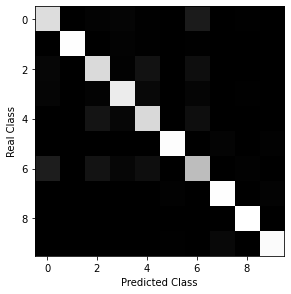

In [13]:
plt.imshow(confusion_matrix,cmap='gray')
plt.tight_layout()
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
print(sum(confusion_matrix.diagonal())/sum(sum(confusion_matrix)))